<a href="https://colab.research.google.com/github/mdhasanali3/3d-model-yolov5/blob/main/merge_product_3d_mode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
from yolov5 import utils
from IPython.display import Image, clear_output  # to display images
display = utils.notebook_init()  # checks

print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

YOLOv5 🚀 v6.1-11-g63ddb6f torch 1.10.0+cu111 CUDA:0 (Tesla T4, 15110MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 42.1/78.2 GB disk)
Setup complete. Using torch 1.10.0+cu111 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)


In [42]:
%cd /content/yolov5
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="9u8eLhhbftnfbyLtXg8t")
project = rf.workspace("3d-model-realworld-evalution").project("merge_3d_dataset")
dataset = project.version(1).download("yolov5")


Extracting Dataset Version Zip to merge_3d_dataset-1 in yolov5pytorch:: 100%|██████████| 1512/1512 [00:00<00:00, 1683.38it/s]


In [46]:
# this is the YAML file Roboflow wrote for us that we're loading into this notebook with our data
%cat {dataset.location}/data.yaml

names:
- pa1
- pa2
- pa3
- pb1
- pb2
- pb3
- pc1
- pc2
- pc3
nc: 9
train: merge_3d_dataset-1/train/images
val: merge_3d_dataset-1/valid/images


In [45]:
!python train.py --img 640 --batch 64 --epochs 110 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/yolov5/merge_3d_dataset-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=110, batch_size=64, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-11-g63ddb6f torch 1.10.0+cu111 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degre

In [47]:
!python detect.py --weights runs/train/exp2/weights/best.pt --img 640 --conf 0.1 --source {dataset.location}/test/images

detect: weights=['runs/train/exp2/weights/best.pt'], source=/content/yolov5/merge_3d_dataset-1/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-11-g63ddb6f torch 1.10.0+cu111 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model Summary: 213 layers, 7034398 parameters, 0 gradients, 15.9 GFLOPs
image 1/10 /content/yolov5/merge_3d_dataset-1/test/images/12_png.rf.093fdd557d3443d1224b5684b76bdbd7.jpg: 640x640 1 pc3, Done. (0.015s)
image 2/10 /content/yolov5/merge_3d_dataset-1/test/images/16_png.rf.3991fac3cde1b530d622d54add9ddb64.jpg: 640x640 1 pc3, Done. (0.015s)
image 3/10 /content/yolov5/merge_3d_dataset-1/test/images/pb2--13-_png.rf.14

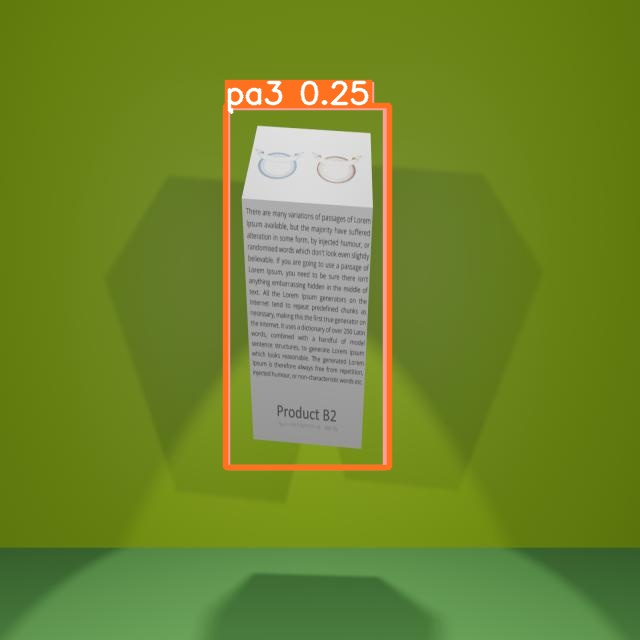

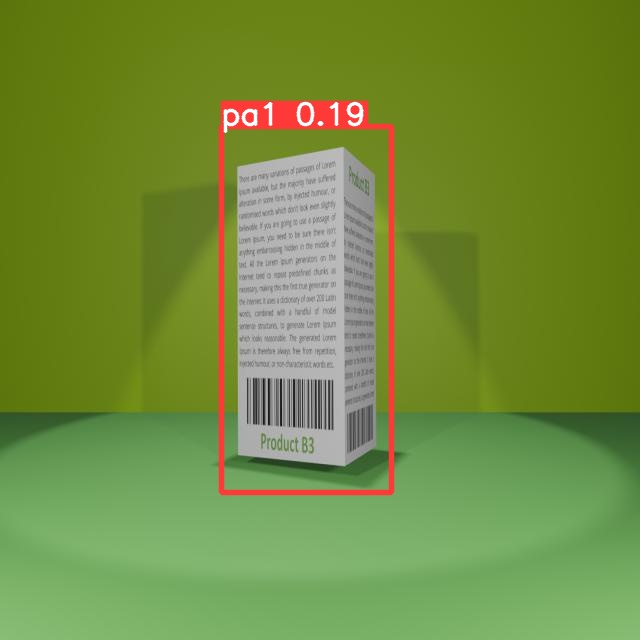

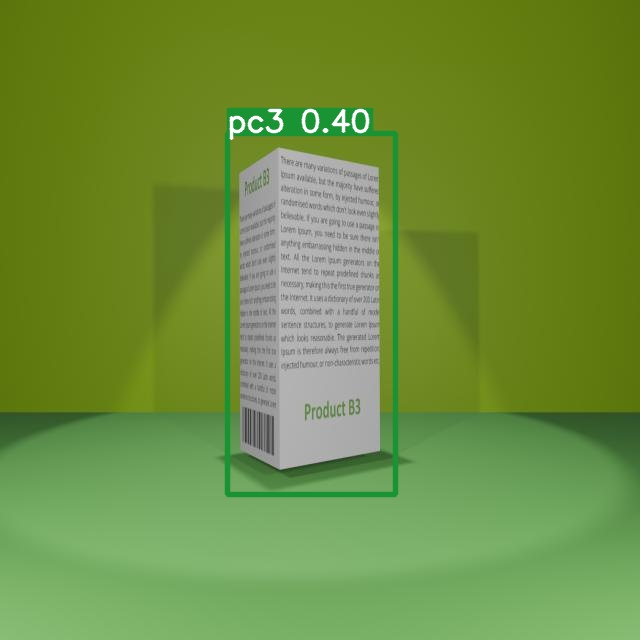

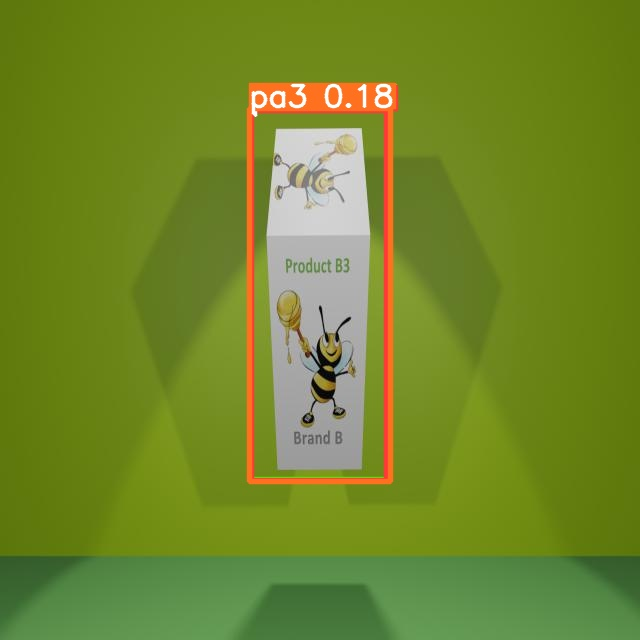

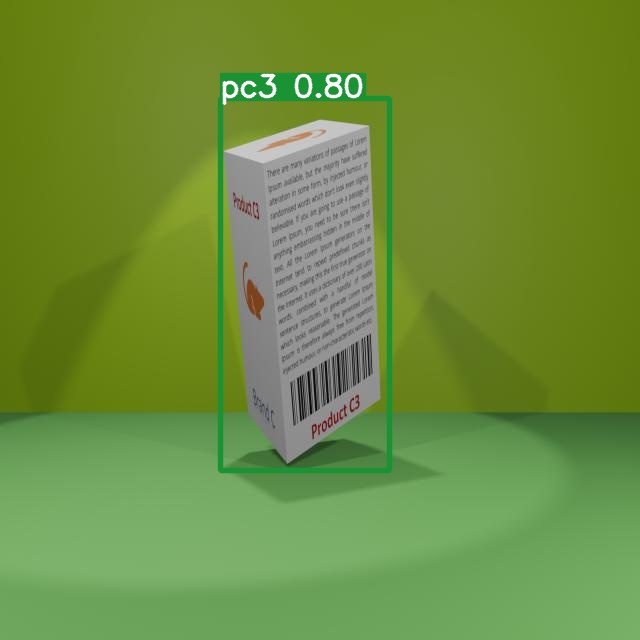

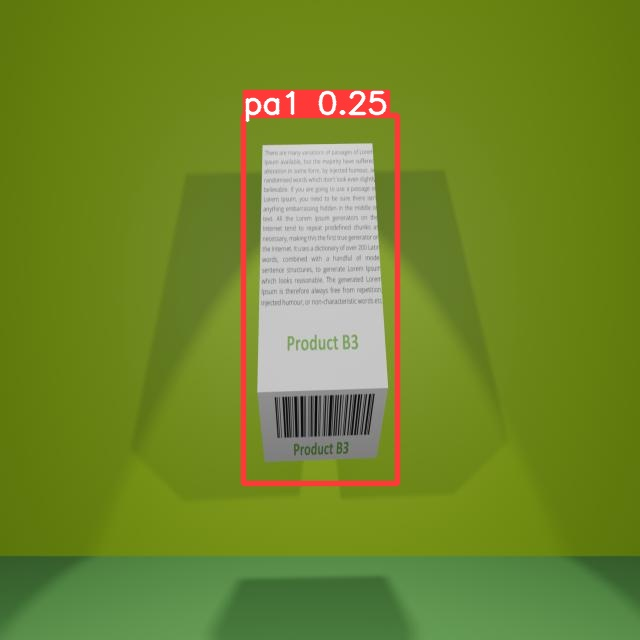

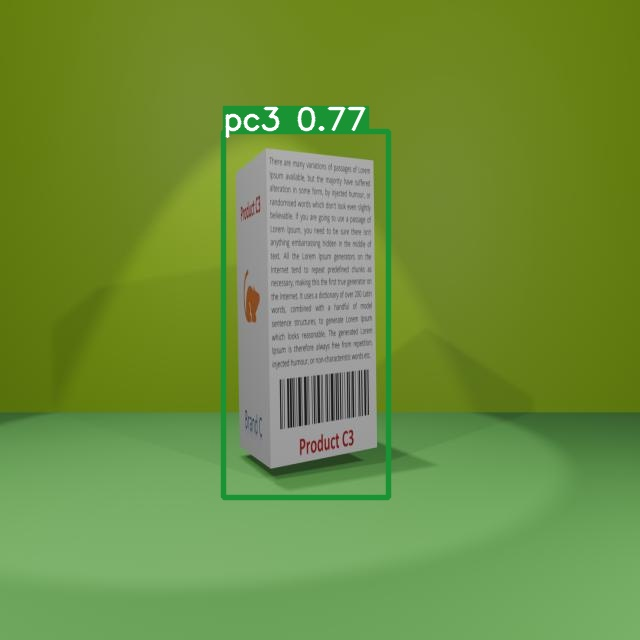

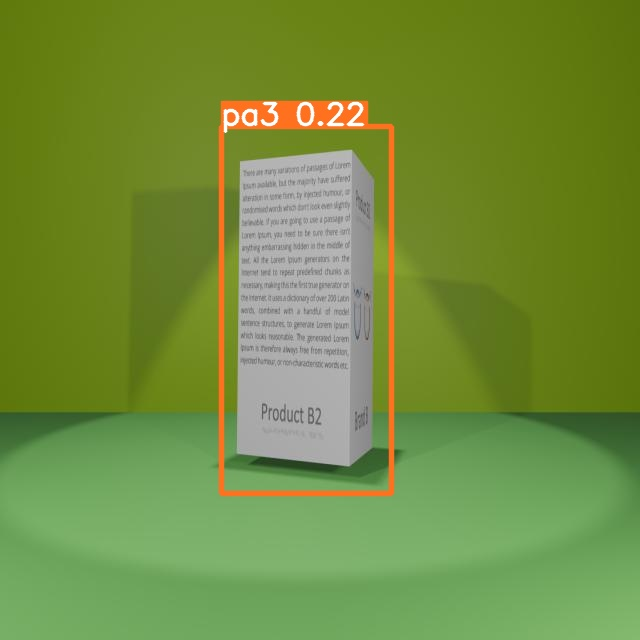

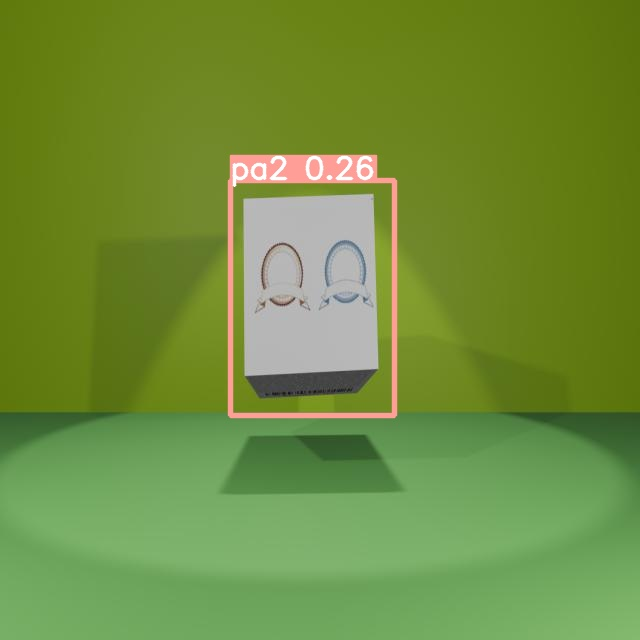

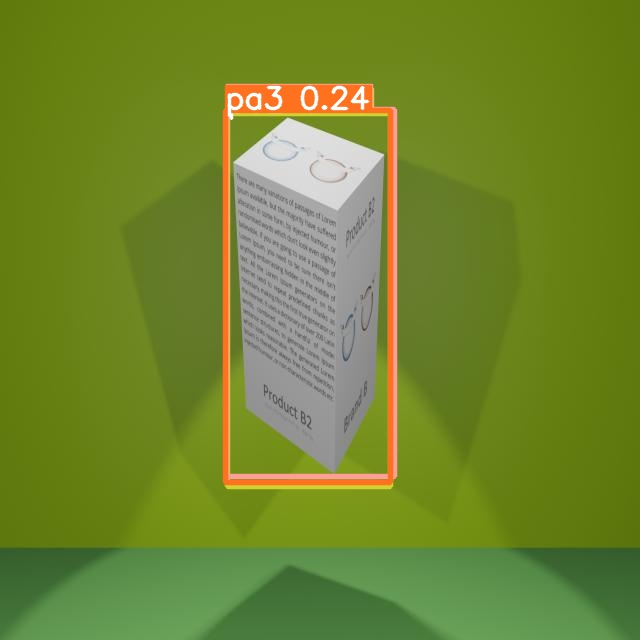

In [48]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp2/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

In [49]:
!python export.py --weights /content/yolov5/runs/train/exp2/weights/best.pt --include tfjs

export: data=data/coco128.yaml, weights=['/content/yolov5/runs/train/exp2/weights/best.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, train=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=12, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['tfjs']
YOLOv5 🚀 v6.1-11-g63ddb6f torch 1.10.0+cu111 CPU

Fusing layers... 
Model Summary: 213 layers, 7034398 parameters, 0 gradients, 15.9 GFLOPs

PyTorch: starting from /content/yolov5/runs/train/exp2/weights/best.pt with output shape (1, 25200, 14) (14.5 MB)

TensorFlow SavedModel: starting export with tensorflow 2.8.0...

                 from  n    params  module                                  arguments                     
2022-03-02 10:26:19.444667: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
  0                -1

In [37]:
cd ../..

/content


In [43]:
pwd

'/content/yolov5'

In [7]:
! git clone https://github.com/mdhasanali3/3d-model-yolov5.git


Cloning into '3d-model-yolov5'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 37 (delta 5), reused 24 (delta 1), pack-reused 0
Unpacking objects: 100% (37/37), done.


In [8]:
!git config --global user.email "hasan48@student.sust.edu"
!git config --global user.name "mdhasanali3"

In [11]:
!git pull origin

Already up to date.


In [14]:
pwd

'/content/yolov5'

In [50]:
%cd /content/yolov5/3d-model-yolov5

/content/yolov5/3d-model-yolov5


In [51]:
%mkdir merge_product_64b_110e


In [52]:
%cp -r /content/yolov5/runs/train/exp2/weights/best.pt /content/yolov5/3d-model-yolov5/merge_product_64b_110e
%cp -r /content/yolov5/runs/train/exp2/weights/best_web_model /content/yolov5/3d-model-yolov5/merge_product_64b_110e 

In [63]:
pwd

'/content/yolov5/3d-model-yolov5'

In [62]:
!git status


On branch main
Your branch and 'origin/main' have diverged,
and have 1 and 1 different commits each, respectively.
  (use "git pull" to merge the remote branch into yours)

All conflicts fixed but you are still merging.
  (use "git commit" to conclude merge)

Changes to be committed:

	new file:   product_b_3d_mode.ipynb



In [ ]:
!git add -A


In [65]:
!git commit -m "merge product model"

[main b378af6] merge product model


In [ ]:
!git remote -v


In [38]:
!git remote rm origin 

In [61]:
!git pull ...

error: You have not concluded your merge (MERGE_HEAD exists).
hint: Please, commit your changes before merging.
fatal: Exiting because of unfinished merge.


In [39]:
!git remote add origin https://ghHSfi0@github.com/mdhasanali3/3d-model-yolov5.git

In [66]:
!git push -u origin main

Counting objects: 15, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (15/15), done.
Writing objects: 100% (15/15), 37.55 MiB | 12.31 MiB/s, done.
Total 15 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 1 local object.
To https://github.com/mdhasanali3/3d-model-yolov5.git
   e0de926..b378af6  main -> main
Branch 'main' set up to track remote branch 'main' from 'origin'.
